## Author: Jarren Javier

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Data Cleaning

In [2]:
#load market data
df = pd.read_csv("marketing_data.csv")

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,9432,1977,Graduation,Together,"$666,666.00",1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA
1,1503,1976,PhD,Together,"$162,397.00",1,1,6/3/13,31,85,...,1,1,0,0,0,0,0,0,0,SP
2,1501,1982,PhD,Married,"$160,803.00",0,0,8/4/12,21,55,...,1,0,0,0,0,0,0,0,0,US
3,5336,1971,Master,Together,"$157,733.00",1,0,6/4/13,37,39,...,1,1,0,0,0,0,0,0,0,SP
4,8475,1973,PhD,Married,"$157,243.00",0,1,3/1/14,98,20,...,0,0,0,0,0,0,0,0,0,IND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
#check dimensions
df.shape

(2240, 28)

In [7]:
#check for NaN values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
#drop rows with NaN values
df1 = df.dropna()

In [9]:
#check if any NaN values still exist
df1.isnull().values.any()

False

In [10]:
#convert dt_customer to date
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

In [11]:
df1['Income'] = df1['Income'].str.replace('$', '')
df1['Income'] = df1['Income'].str.replace(',', '').astype(float)

### Create Total Columns

In [12]:
#Calculate Total Purchases
total_purchases = df1[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [13]:
df1.columns.get_loc("NumStorePurchases")

18

In [14]:
#Create Total Purchases Column
df1.insert(19, 'Total_Purchases',total_purchases)

In [15]:
#Calculate Total Amount Spent
total_spent = df1[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

In [16]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,7,6,0,0,0,0,0,0,0,SA
1,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
2,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,29,0,0,0,0,0,0,0,0,US
3,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,2,1,0,0,0,0,0,0,0,SP
4,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,22,0,0,0,0,0,0,0,0,IND


In [17]:
#Create Total Amount Spent Column
df1.insert(15, 'Total_Spent',total_spent)

In [18]:
df1.columns.get_loc("Teenhome")

6

In [19]:
#Calculate Total Dependents
dependents = df1[['Kidhome','Teenhome']].sum(axis=1)

In [20]:
#Create Dependents Column
df1.insert(6, 'Dependents',dependents)

In [21]:
#check for changes
df1[['Total_Spent','Total_Purchases','Dependents']].head(2)

,Total_Spent,Total_Purchases,Dependents
0,62,7,1
1,107,1,2


### Change Column Names

In [22]:
#convert yolo, absurd and alone into one value 'single'
df1['Marital_Status'] = df1['Marital_Status'].str.replace('YOLO', 'Single')
df1['Marital_Status'] = df1['Marital_Status'].str.replace('Alone', 'Single')
df1['Marital_Status'] = df1['Marital_Status'].str.replace('Absurd', 'Single')


In [23]:
df1['Marital_Status'].unique()

array(['Together', 'Married', 'Divorced', 'Single', 'Widow'], dtype=object)

In [24]:
#update Education Categories
df1['Education'] = df1['Education'].replace(['Graduation'],'Bachelor')
df1['Education'] = df1['Education'].replace(['2n Cycle'],'Bachelor')
df1['Education'] = df1['Education'].replace(['Basic'],'HighSchool')

In [25]:
df1['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'HighSchool'], dtype=object)

In [26]:
#set index
df1.index = df1["ID"]
del df1["ID"]

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df1.describe()

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,1968.82,52247.25,0.44,0.95,0.51,49.01,305.09,26.36,167.00,37.64,...,5.80,12.56,5.32,0.07,0.07,0.07,0.06,0.01,0.15,0.01
std,11.99,25173.08,0.54,0.75,0.54,28.95,337.33,39.79,224.28,54.75,...,3.25,7.20,2.43,0.26,0.26,0.26,0.24,0.12,0.36,0.10
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1959.00,35303.00,0.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,...,3.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1970.00,51381.50,0.00,1.00,0.00,49.00,174.50,8.00,68.00,12.00,...,5.00,12.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1977.00,68522.00,1.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,...,8.00,18.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1996.00,666666.00,2.00,3.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,13.00,32.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Create Numerical and Categorical Variable Data Frame

In [28]:
#create data frame with only categorical variables
categorical = df1[['Marital_Status','Education','Country']]
categorical.head(3)

,Marital_Status,Education,Country
ID,,,
9432,Together,Bachelor,SA
1503,Together,PhD,SP
1501,Married,PhD,US


In [29]:
#create dataf rame with only numerical variables
numerical = df1.drop(['Education','Marital_Status','Country','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],axis=1)

In [30]:
#convert int to numerical
numerical['Income'] = numerical['Income'].astype('int64')

In [31]:
numerical['Income'].dtypes

dtype('int64')

In [32]:
numerical.head(2)

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,,,,,,
9432,1977,666666,1,1,0,2013-06-02,23,9,14,18,8,1,12,62,4,3,1,3,7,6
1503,1976,162397,1,2,1,2013-06-03,31,85,1,16,2,1,2,107,0,0,0,1,1,1


# Exploratory Data Analysis

## Customer Segmentation

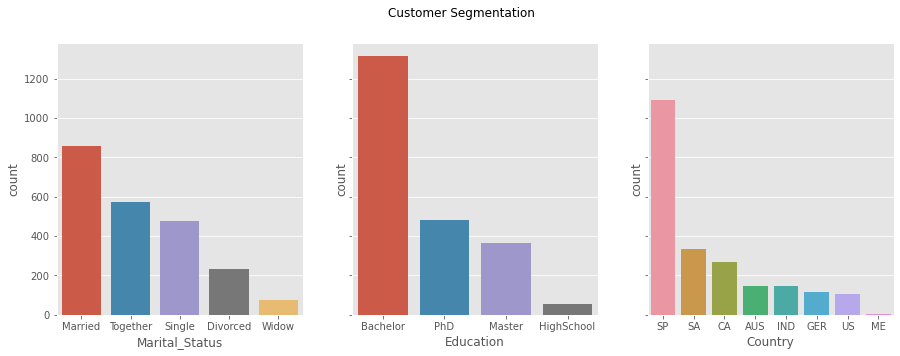

In [33]:
plt.style.use('ggplot')

#create bar chart for categorical variables
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Customer Segmentation')
#marital_status
sns.countplot(ax=axes[0], x='Marital_Status', data=df1,
              order = df1['Marital_Status'].value_counts().index)

#Education
sns.countplot(ax=axes[1], x='Education', data=df1,
             order = df1['Education'].value_counts().index)

#Country
sns.countplot(ax=axes[2], x='Country', data=df1,
             order = df1['Country'].value_counts().index)

In [34]:
print(df1['Education'].value_counts(),'\n')
print(df1['Marital_Status'].value_counts(),'\n')
print(df1['Country'].value_counts(),'\n')

Bachelor      1316
PhD            481
Master         365
HighSchool      54
Name: Education, dtype: int64 

Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64 

SP     1093
SA      337
CA      266
AUS     147
IND     147
GER     116
US      107
ME        3
Name: Country, dtype: int64 



### Numerical Variables Boxplot

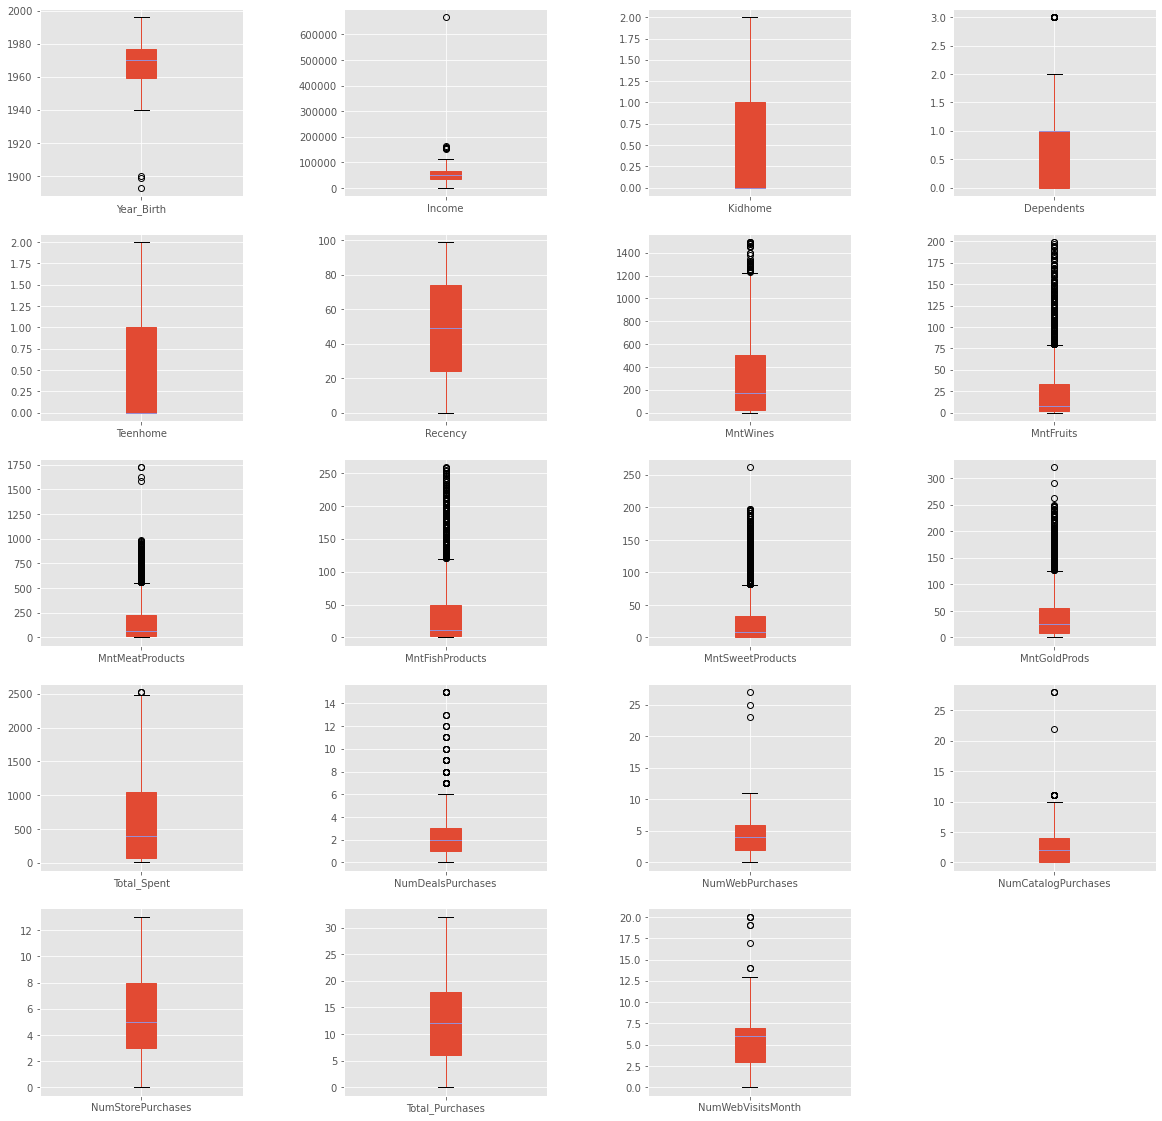

In [35]:
plt.style.use('ggplot')
numerical.plot(subplots=True, layout=(5,4), kind='box', 
               figsize=(20,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

### Calculate Sales By Product

In [36]:
ProductSales = df1[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

Sales By Product 
 MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64


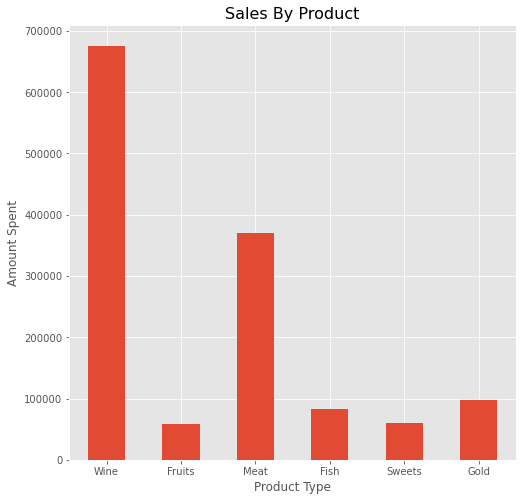

In [37]:
money_spent = ProductSales.sum()

plt.style.use('ggplot')
money_spent.plot(kind='bar',figsize=(8,8))
plt.xticks([0, 1, 2, 3, 4, 5], ['Wine','Fruits','Meat','Fish','Sweets', 'Gold'])
plt.xticks(rotation = 0)
plt.title('Sales By Product',fontsize=16)
plt.ylabel('Amount Spent')
plt.xlabel('Product Type')

print('Sales By Product \n', money_spent)

### What are the Product Sales By Country?

In [38]:
country_prod = df1[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Country']]

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Country                                                          
AUS         42752       3689            22328             5546   
CA          84066       7681            45925             9980   
GER         36776       2980            20272             4601   
IND         36236       3788            23729             4818   
ME           1729          8              817              226   
SA         105918       8937            58398            13670   
SP         336392      28288           178409            40153   
US          32214       3034            20185             4411   

         MntSweetProducts  MntGoldProds  
Country                                  
AUS                  4129          7132  
CA                   7607         12144  
GER                  2801          5768  
IND                  3221          6014  
ME                    122           220  
SA                   9019         15129  
SP 

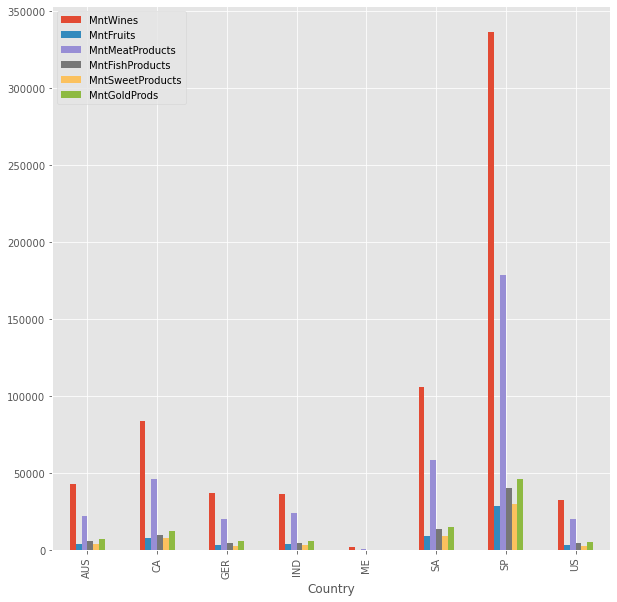

In [39]:
country_sales = country_prod.groupby(['Country']).sum()
print(country_sales)
country_sales.plot(kind='bar',figsize=(10,10))

## Regression Analysis for Number of Store Purchases

In [40]:
StorePurchase_Corr = df1.corr()['NumStorePurchases'].sort_values(ascending=False)
print('Store Purchase Correlation: \n\n', StorePurchase_Corr)

Store Purchase Correlation: 

 NumStorePurchases      1.00
Total_Purchases        0.86
Total_Spent            0.68
MntWines               0.64
Income                 0.53
NumCatalogPurchases    0.52
NumWebPurchases        0.52
MntMeatProducts        0.49
MntFruits              0.46
MntFishProducts        0.46
MntSweetProducts       0.46
MntGoldProds           0.39
AcceptedCmp5           0.21
AcceptedCmp1           0.18
AcceptedCmp4           0.18
AcceptedCmp2           0.09
NumDealsPurchases      0.07
Teenhome               0.05
Response               0.04
Recency               -0.00
Complain              -0.02
AcceptedCmp3          -0.07
Year_Birth            -0.13
Dependents            -0.32
NumWebVisitsMonth     -0.43
Kidhome               -0.50
Name: NumStorePurchases, dtype: float64


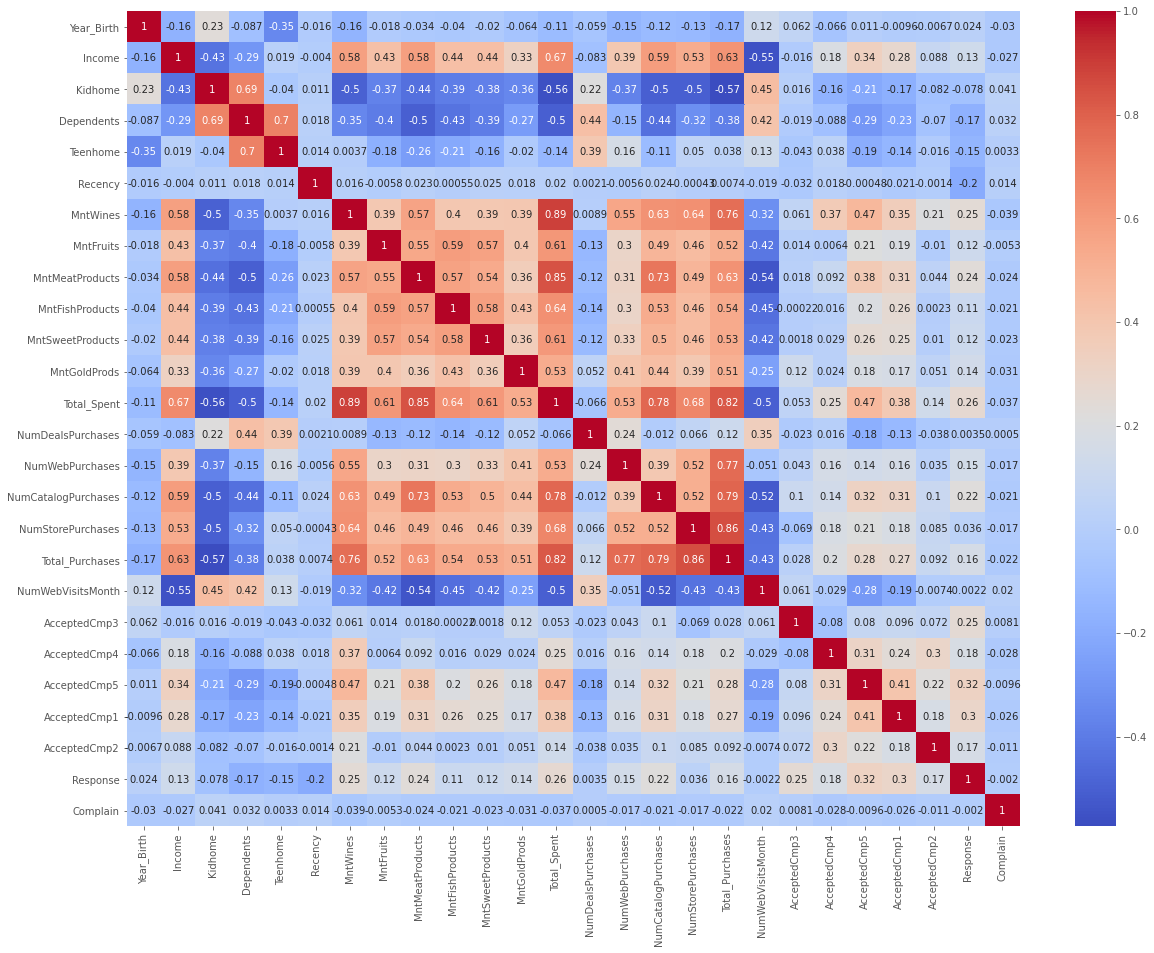

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)
plt.show()


### Create dummy variables for categorical variables 

In [42]:
#create dummy variables for all categorical variables
categorical2 = pd.get_dummies(categorical)
categorical2.head(2)

,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_Bachelor,Education_HighSchool,Education_Master,Education_PhD,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
ID,,,,,,,,,,,,,,,,,
9432,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1503,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [43]:
#combine numerical and dummy categorical variables
df3 = pd.concat([numerical,categorical2],axis = 1)

In [44]:
#drop customer date
df3 = df3.drop('Dt_Customer',axis=1)

In [45]:
df3.head(2)

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
ID,,,,,,,,,,,,,,,,,,,,,
9432,1977,666666,1,1,0,23,9,14,18,8,...,0,0,0,0,0,0,0,1,0,0
1503,1976,162397,1,2,1,31,85,1,16,2,...,0,1,0,0,0,0,0,0,1,0


In [46]:
X = df3.drop('NumStorePurchases',axis=1)
Y = df1['NumStorePurchases']

## OLS Linear Regression Model

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
X = df3.drop('NumStorePurchases',axis=1)
Y = df1['NumStorePurchases']

In [49]:
model_1 = sm.OLS(Y,X)

In [50]:
fit = model_1.fit()

In [51]:
fit.pvalues.sort_values(ascending=False)

Country_US                0.99
Education_Master          0.99
Year_Birth                0.98
Country_ME                0.97
Marital_Status_Single     0.96
Country_GER               0.93
Marital_Status_Widow      0.93
Country_IND               0.91
Marital_Status_Married    0.91
Country_AUS               0.91
Marital_Status_Together   0.91
Country_SP                0.91
Education_Bachelor        0.90
Education_PhD             0.89
Country_CA                0.87
Education_HighSchool      0.86
Marital_Status_Divorced   0.86
Country_SA                0.82
NumWebVisitsMonth         0.21
NumDealsPurchases         0.20
Teenhome                  0.02
Kidhome                   0.00
Income                    0.00
Recency                   0.00
Dependents                0.00
MntFruits                 0.00
Total_Purchases           0.00
NumWebPurchases           0.00
Total_Spent               0.00
MntGoldProds              0.00
MntSweetProducts          0.00
MntFishProducts           0.00
MntMeatP

In [52]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.079e+29
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:37:32   Log-Likelihood:                 65037.
No. Observations:                2216   AIC:                        -1.300e+05
Df Residuals:                    2185   BIC:                        -1.298e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth               1.735e-18   8.81e-17      0.020      0.984   -1.71e-16    1.75e-16
Income                  -4.117e-19   5.51e-20     -7.477      0.000    -5.2e-19   -3.04e-19
Kidhome                  6.509e-15   1.64e-15      3.963      0.000    3.29e-15    9.73e-15
Dependents               1.929e-14   1.15e-15     16.814      0.000     1.7e-14    2.15e-14
Teenhome                -3.702e-15   1.54e-15     -2.404      0.016   -6.72e-15   -6.82e-16
Recency                 -2.586e-16   3.23e-17     -8.011      0.000   -3.22e-16   -1.95e-16
MntWines                 1.758e-15    6.9e-18    254.833      0.000    1.74e-15    1.77e-15
MntFruits                6.544e-16   3.07e-17     21.340      0.000    5.94e-16    7.15e-16
MntMeatProducts          1.734e-15   9.49e-18    182.694      0.000    1.72e-15    1.75e-15
MntFishProducts          1.769e-15   2.44e-17     72.514      0.000    1.72e-15    1.82e-15
MntSweetProducts         2.566e-15   2.93e-17     87.714      0.000    2.51e-15    2.62e-15
MntGoldProds             1.939e-15   2.06e-17     94.252      0.000     1.9e-15    1.98e-15
Total_Spent             -1.731e-15   5.81e-18   -297.899      0.000   -1.74e-15   -1.72e-15
NumDealsPurchases        7.876e-16   6.19e-16      1.272      0.204   -4.27e-16       2e-15
NumWebPurchases            -1.0000   7.03e-16  -1.42e+15      0.000      -1.000      -1.000
NumCatalogPurchases        -1.0000   6.78e-16  -1.48e+15      0.000      -1.000      -1.000
Total_Purchases             1.0000   4.38e-16   2.28e+15      0.000       1.000       1.000
NumWebVisitsMonth       -7.251e-16   5.84e-16     -1.243      0.214   -1.87e-15    4.19e-16
Marital_Status_Divorced -1.066e-14   6.04e-14     -0.176      0.860   -1.29e-13    1.08e-13
Marital_Status_Married  -7.105e-15   6.06e-14     -0.117      0.907   -1.26e-13    1.12e-13
Marital_Status_Single   -2.665e-15   6.07e-14     -0.044      0.965   -1.22e-13    1.16e-13
Marital_Status_Together -7.105e-15   6.05e-14     -0.118      0.906   -1.26e-13    1.11e-13
Marital_Status_Widow    -5.329e-15      6e-14     -0.089      0.929   -1.23e-13    1.12e-13
Education_Bachelor       -9.77e-15   7.55e-14     -0.129      0.897   -1.58e-13    1.38e-13
Education_HighSchool    -1.332e-14   7.59e-14     -0.175      0.861   -1.62e-13    1.36e-13
Education_Master        -8.882e-16   7.53e-14     -0.012      0.991   -1.49e-13    1.47e-13
Education_PhD           -1.066e-14   7.53e-14     -0.141      0.888   -1.58e-13    1.37e-13
Country_AUS             -4.441e-15   3.78e-14     -0.117      0.907   -7.86e-14    6.97e-14
Country_CA              -6.217e-15   3.78e-14     -0.165      0.869   -8.03e-14    6.79e-14
Country_GER             -3.109e-15   3.79e-14     -0.082      0.935   -7.75e-14    7.12e-14
Country_IND             -4.219e-15    3.8e-14  

In [53]:
X_2 = X[['Recency','Dependents','Income','Kidhome','Teenhome',
        'MntFruits','MntWines','Total_Purchases',
       'NumCatalogPurchases','MntFishProducts','MntSweetProducts',
        'MntGoldProds','Total_Spent','NumWebPurchases','MntMeatProducts']]

In [54]:
model_2 = sm.OLS(Y,X_2)

In [55]:
fit_2 = model_2.fit()

In [56]:
fit_2.pvalues.sort_values(ascending=False)

Kidhome               0.97
Teenhome              0.92
Dependents            0.92
Recency               0.81
MntSweetProducts      0.76
MntGoldProds          0.05
MntFishProducts       0.01
MntFruits             0.00
MntMeatProducts       0.00
MntWines              0.00
Total_Spent           0.00
Income                0.00
NumWebPurchases       0.00
NumCatalogPurchases   0.00
Total_Purchases       0.00
dtype: float64

In [57]:
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      NumStorePurchases   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.537e+27
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        09:37:48   Log-Likelihood:                          57254.
No. Observations:                2216   AIC:                                 -1.145e+05
Df Residuals:                    2203   BIC:                                 -1.144e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Recency              2.294e-16   9.75e-16      0.235      0.814   -1.68e-15    2.14e-15
Dependents           2.887e-15   2.92e-14      0.099      0.921   -5.43e-14    6.01e-14
Income               2.511e-17   1.56e-18     16.106      0.000    2.21e-17    2.82e-17
Kidhome              1.971e-15   4.53e-14      0.044      0.965   -8.68e-14    9.08e-14
Teenhome            -4.455e-15   4.63e-14     -0.096      0.923   -9.53e-14    8.64e-14
MntFruits            3.071e-15   1.02e-15      3.012      0.003    1.07e-15    5.07e-15
MntWines              1.62e-15   2.12e-16      7.656      0.000     1.2e-15    2.03e-15
Total_Purchases         1.0000   1.32e-14   7.58e+13      0.000       1.000       1.000
NumCatalogPurchases    -1.0000   2.22e-14  -4.51e+13      0.000      -1.000      -1.000
MntFishProducts       2.09e-15    8.1e-16      2.579      0.010    5.01e-16    3.68e-15
MntSweetProducts    -2.902e-16   9.69e-16     -0.299      0.765   -2.19e-15    1.61e-15
MntGoldProds         1.355e-15   6.77e-16      2.004      0.045    2.88e-17    2.68e-15
Total_Spent         -1.618e-15   1.86e-16     -8.693      0.000   -1.98e-15   -1.25e-15
NumWebPurchases        -1.0000   2.19e-14  -4.57e+13      0.000      -1.000      -1.000
MntMeatProducts      1.586e-15   3.12e-16      5.089      0.000    9.75e-16     2.2e-15
==============================================================================
Omnibus:                     2995.279   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2571803.228
Skew:                          -6.979   Prob(JB):                         0.00
Kurtosis:                     169.309   Cond. No.                     1.40e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Prediction Results

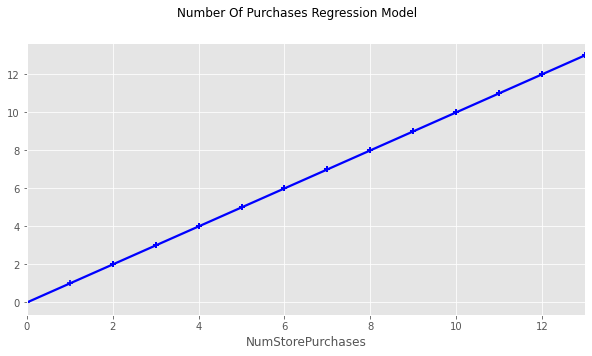

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Number Of Purchases Regression Model')
sns.regplot(Y_test,Y_pred, marker = '+',color='blue', ax=ax)

## Which Campaign is the Best?

In [58]:
#create data frame where only one campaign is accepted
campaign_correct = df1[((df1.AcceptedCmp1 + df1.AcceptedCmp2 + 
             df1.AcceptedCmp3+ df1.AcceptedCmp4+ df1.AcceptedCmp5 )  == 1 ) ]

There are several instances where multiple campaigns were accepted and a response was given by customers. For example campaign 1 and campaign 2 were accepted and received a response. Due to this fact, it was impossible to tell what campaign was responded to the most. In order to distinguish what campaign holds significance, only columns where one campaign was accepted was kept for analysis.

In [59]:
campaign_correct.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Dependents,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
4248,1960,Master,Single,98777.00,0,0,0,2014-02-17,23,1000,...,19,1,0,1,0,0,0,0,0,SP
7451,1960,Master,Single,98777.00,0,0,0,2014-02-17,23,1000,...,19,1,0,1,0,0,0,0,0,SP
2109,1990,Bachelor,Single,96843.00,0,0,0,2013-04-23,60,448,...,27,2,0,0,1,0,0,1,0,SP


In [60]:
#create df with only campaign acceptance
campaigns = campaign_correct[["AcceptedCmp1",
                              "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]]

In [61]:
#get sum of each campaign accpetance
campaign_acceptance = campaigns.sum()

AcceptedCmp1     52
AcceptedCmp2      1
AcceptedCmp3    129
AcceptedCmp4     83
AcceptedCmp5     58
dtype: int64


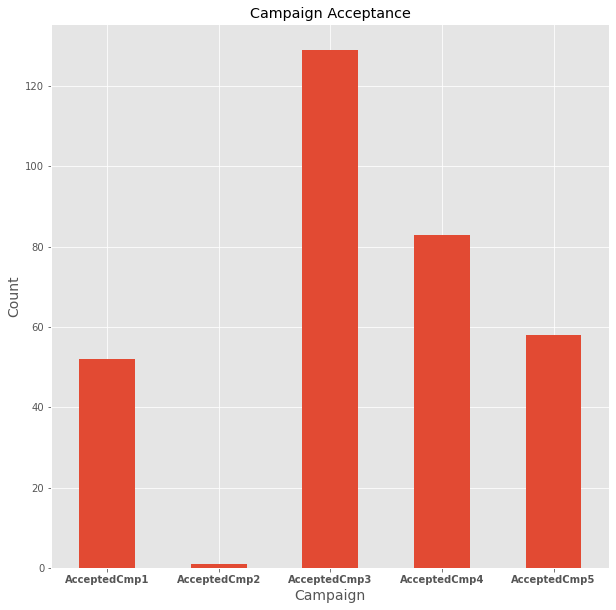

In [62]:
print(campaign_acceptance)

campaign_acceptance.plot(kind='bar',figsize=(10,10))

plt.xticks(rotation = 0,weight="bold")

plt.title('Campaign Acceptance')
plt.xlabel('Campaign',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

In [63]:
campaign_response = df1[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
                         "AcceptedCmp4","AcceptedCmp5","Response"]]

In [64]:
print(campaign_acceptance)

#calculate reponse rate success for each campaign
response_rate = campaign_response.groupby(["Response"]).sum()
response_rate

AcceptedCmp1     52
AcceptedCmp2      1
AcceptedCmp3    129
AcceptedCmp4     83
AcceptedCmp5     58
dtype: int64


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Response,,,,,
0,63,10,86,102,71
1,79,20,77,62,91


In [65]:
#calculate response acceptance rate
print('Campaign 1 Reponse Rate:',(13/52)*100)
print('Campaign 2 Reponse Rate:',(1/1)*100)
print('Campaign 3 Reponse Rate:',(55/129)*100)
print('Campaign 4 Reponse Rate:',(11/83)*100)
print('Campaign 5 Reponse Rate:',(20/58)*100)


Campaign 1 Reponse Rate: 25.0
Campaign 2 Reponse Rate: 100.0
Campaign 3 Reponse Rate: 42.63565891472868
Campaign 4 Reponse Rate: 13.253012048192772
Campaign 5 Reponse Rate: 34.48275862068966


### Campaign Reponse Rate Analysis
Based on reponsonse rate of 42.64% for Campaign 3 its high acceptance count (129), Campaign looks to be the most successful by far. Campaign 2 only had 1 response from a customer where it was the only campaign accepted. There is not enough data to analyze Campaign 2 thoroughly. Campaign 1 (52 acceptants) and Campaign 5 (58 acceptants) making them not as significant as Campaign 3. Campaign 4 had the lowest response rate at 13.25%. This indicates Campaign 4 was the least liked by customers and should not be used any further.

## Analysis of Campaign 3 

In [66]:
print('Campaign 3 Reponse Rate:',(55/129)*100)

Campaign 3 Reponse Rate: 42.63565891472868


### What does the average customer who responded to Campaign 3 look like?

In [67]:
campaign3 = campaign_correct.drop(['AcceptedCmp1','AcceptedCmp2',
                            'AcceptedCmp4','AcceptedCmp5'],axis=1)

In [68]:
campaign3_responded = campaign3[(campaign3.Response != 0 ) & (campaign3.AcceptedCmp3 != 0)]

In [69]:
campaign3_responded.shape

(55, 26)

In [70]:
#campaign3.corr()['AcceptedCmp3'].sort_values(ascending=False)

In [71]:
campaign3_responded.describe().loc[['count','mean']]

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,Response,Complain
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,...,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,1969.85,42664.02,0.56,0.91,0.35,33.09,282.49,23.42,129.98,26.07,...,532.85,2.58,4.51,3.20,4.18,11.89,6.76,1.00,1.00,0.02


In [72]:
campaign3_responded.describe()

,Year_Birth,Income,Kidhome,Dependents,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumWebVisitsMonth,AcceptedCmp3,Response,Complain
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,...,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,1969.85,42664.02,0.56,0.91,0.35,33.09,282.49,23.42,129.98,26.07,...,532.85,2.58,4.51,3.20,4.18,11.89,6.76,1.00,1.00,0.02
std,12.48,18642.13,0.54,0.62,0.48,26.35,358.42,34.88,184.90,41.50,...,592.68,1.78,3.30,3.19,2.69,8.14,1.55,0.00,0.00,0.13
min,1943.00,7500.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,...,18.00,0.00,0.00,0.00,2.00,3.00,2.00,1.00,1.00,0.00
25%,1963.50,30890.50,0.00,1.00,0.00,10.00,14.50,2.00,12.50,2.00,...,68.50,1.00,1.50,1.00,2.00,5.00,6.00,1.00,1.00,0.00
50%,1971.00,37774.00,1.00,1.00,0.00,27.00,96.00,8.00,52.00,7.00,...,246.00,2.00,4.00,2.00,3.00,10.00,7.00,1.00,1.00,0.00
75%,1978.50,51937.50,1.00,1.00,1.00,53.00,491.00,37.00,196.00,28.50,...,889.50,4.00,7.00,5.00,5.00,18.50,8.00,1.00,1.00,0.00
max,1990.00,86979.00,2.00,2.00,1.00,97.00,1181.00,185.00,835.00,160.00,...,2209.00,7.00,11.00,10.00,11.00,32.00,9.00,1.00,1.00,1.00


In [73]:
campaign3_responded.describe().to_csv("my_description.csv")

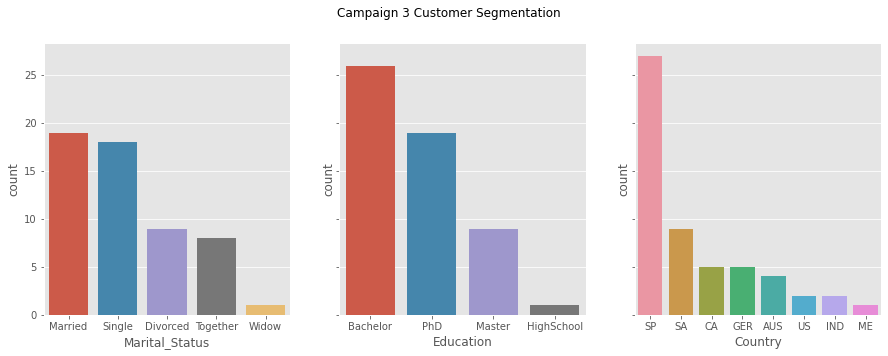

In [74]:
#create bar chart for categorical variables
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Campaign 3 Customer Segmentation')
#marital_status
sns.countplot(ax=axes[0], x='Marital_Status', data=campaign3_responded,
              order = campaign3_responded['Marital_Status'].value_counts().index)

#Education
sns.countplot(ax=axes[1], x='Education', data=campaign3_responded,
              order = campaign3_responded['Education'].value_counts().index)

#Country
sns.countplot(ax=axes[2], x='Country', data=campaign3_responded,
                 order = campaign3_responded['Country'].value_counts().index)


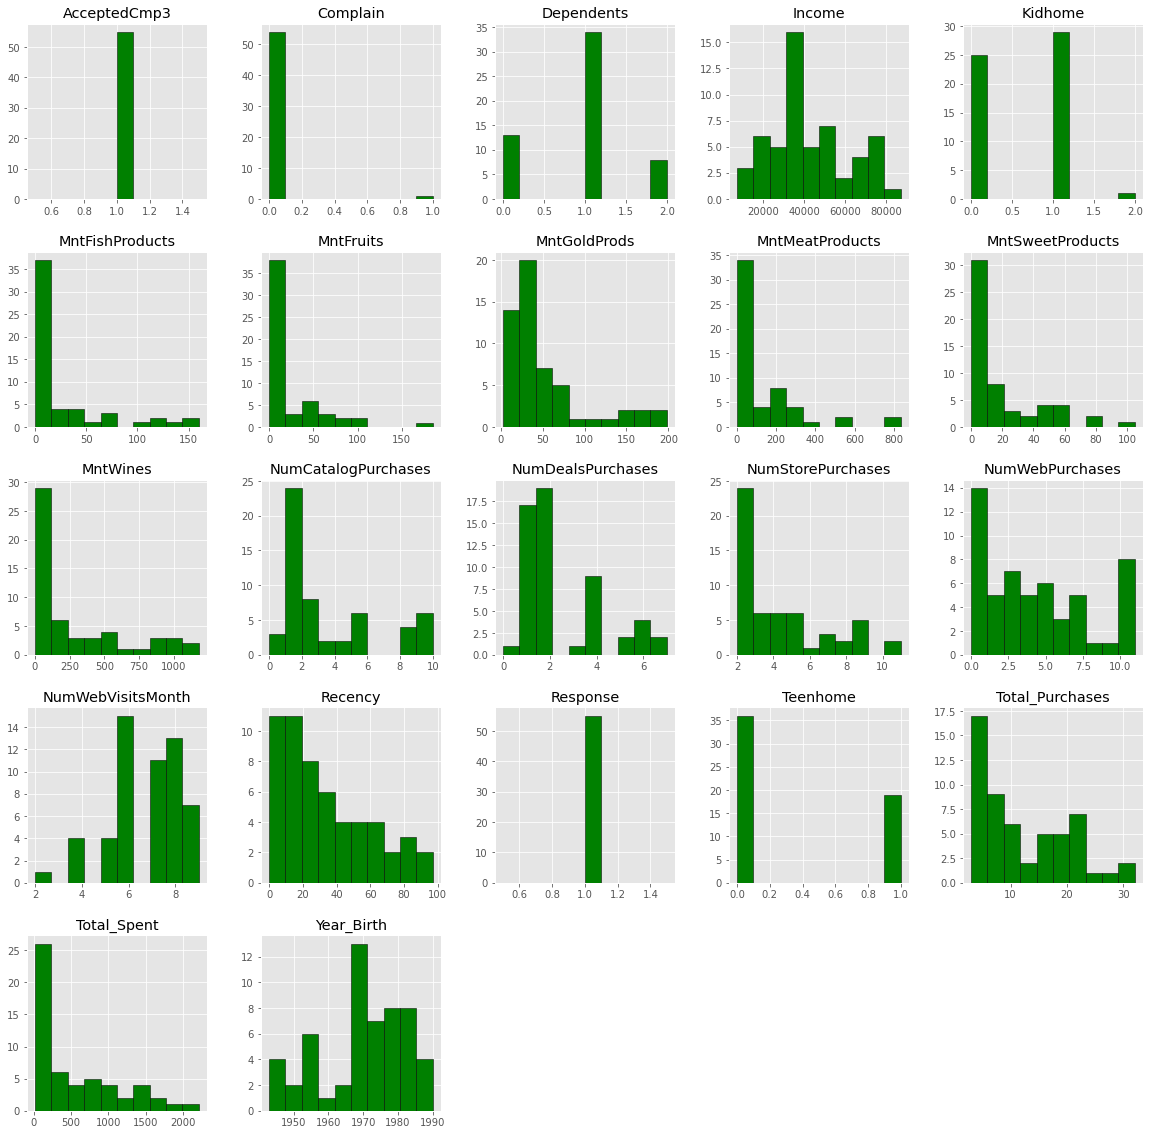

In [75]:
campaign3_responded.hist(color = 'green',edgecolor='black', figsize=(20,20))
plt.show()